In [272]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime

In [273]:
url = "https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019"
url_get = requests.get(url)
soup = BeautifulSoup(url_get.text, 'html.parser')

In [274]:
table = soup.find('table', attrs={'class' : 'table'})

In [275]:
tr = table.find_all('tr', attrs={'class':'verySoftGreyBg'})

In [276]:
temp =[]

for i in range (1, 247):
    row = table.find_all('tr')[i]
    #get Tanggal
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip()
    #get kurs_jual
    kurs_jual = row.find_all('td')[1].text
    kurs_jual = kurs_jual.strip()
    #get kurs_beli
    kurs_beli = row.find_all('td')[2].text
    kurs_beli = kurs_beli.strip()
    temp.append((tanggal, kurs_jual, kurs_beli))

temp = temp[::-1]


In [277]:
df = pd.DataFrame(temp, columns = ('Tanggal', 'Kurs Jual', 'Kurs Beli'))
df.head()

,Tanggal,Kurs Jual,Kurs Beli
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"


In [278]:
df['Kurs Beli'] = df['Kurs Beli'].str.replace(",", ".")
df['Kurs Jual'] = df['Kurs Jual'].str.replace(",", ".")
df[['Kurs Beli', 'Kurs Jual']] = df[['Kurs Beli', 'Kurs Jual']].astype('float64')
df.dtypes

Tanggal       object
Kurs Jual    float64
Kurs Beli    float64
dtype: object

In [279]:
df['Tanggal'] = df['Tanggal'].str.replace("Januari", "Jan")
df['Tanggal'] = df['Tanggal'].str.replace("Februari", "Feb")
df['Tanggal'] = df['Tanggal'].str.replace("Maret", "Mar")
df['Tanggal'] = df['Tanggal'].str.replace("April", "Apr")
df['Tanggal'] = df['Tanggal'].str.replace("Mei", "May")
df['Tanggal'] = df['Tanggal'].str.replace("Juni", "Jun")
df['Tanggal'] = df['Tanggal'].str.replace("Juli", "Jul")
df['Tanggal'] = df['Tanggal'].str.replace("Agustus", "Aug")
df['Tanggal'] = df['Tanggal'].str.replace("September", "Sep")
df['Tanggal'] = df['Tanggal'].str.replace("Oktober", "Oct")
df['Tanggal'] = df['Tanggal'].str.replace("November", "Nov")
df['Tanggal'] = df['Tanggal'].str.replace("Desember", "Dec")

In [280]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True)

In [281]:
df['Bulan'] = df['Tanggal'].dt.month_name()

In [282]:
df.set_index('Tanggal', inplace=True)

In [283]:
Monthly = df.groupby('Bulan').agg({'Kurs Jual' : 'mean', 'Kurs Beli' : 'mean'})
Monthly

,Kurs Jual,Kurs Beli
Bulan,,
April,127.367368,126.071053
August,134.737727,133.372273
December,129.099000,127.791500
February,127.862632,126.571053
January,130.750000,129.421818
July,130.464348,129.133043
June,132.400667,131.046000
March,128.524500,127.218000
May,131.472857,130.135238


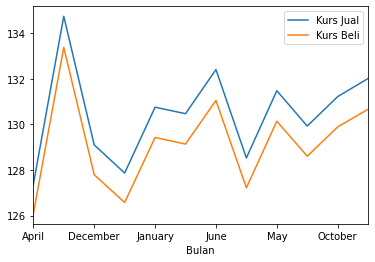

In [284]:
Monthly.plot()

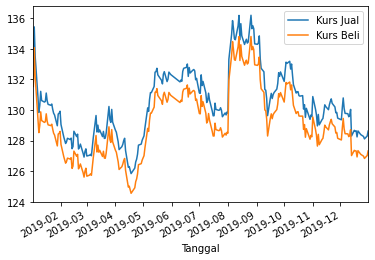

In [285]:
df.plot(kind='line')